In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [2]:
import kurvy

In [3]:
# CONFIG
scale_min = 0
scale_max = 1
train_test_split = (85,15)

## Data Prep

In [688]:
def make_poly_data(n_samples, degree=None, fuzz=None, seed=None):
    
    max_degree = 15
    rng = np.random.default_rng(seed)


    if not isinstance(n_samples, int):
        raise ValueError(
            f"Expected integer for 'n_samples'; got {type(n_samples)}."
        )
    if fuzz:
        if not isinstance(fuzz, int) or (not 0 <= fuzz <= 3):
            raise ValueError(f"'fuzz' must be integer in [0,3].")
    if degree:
        if not isinstance(degree, int):
            raise ValueError(f"'degree' must be integer in [2,10].")
        if degree < 2 or degree > 10:
            raise ValueError(f"'degree' must be integer in [2,10].")
    else:
        
        degree = rng.integers(2,max_degree+1)

        
        
    params = list(np.round(rng.normal(0,0.1,size=degree), 3))

    X = np.linspace(0,1, n_samples)

    Y = np.zeros(n_samples)
    for i in zip(params,reversed(range(len(params)))):
        print(f"coef = {i[0]}, power = {i[1]}")
        Y = Y + i[0]*X**i[1]

    if fuzz == 1:
        Y_fuzzy = kurvy.utils.add_fuzz(Y, 1, 0, 0.01, seed=seed)

    elif fuzz == 2:
        Y_fuzzy = kurvy.utils.add_fuzz(Y, 1, 0, 0.01, seed=seed)
        Y_fuzzy = kurvy.utils.add_fuzz(Y_fuzzy, 0.3, 0, 0.075, seed=seed)

    elif fuzz == 3:
        Y_fuzzy = kurvy.utils.add_fuzz(Y, 1, 0, 0.01, seed=seed)
        Y_fuzzy = kurvy.utils.add_fuzz(Y_fuzzy, 0.3, 0, 0.075, seed=seed)
        Y_fuzzy = kurvy.utils.add_fuzz(Y_fuzzy, 0.05, 0, 0.3, seed=seed)

    else:
        Y_fuzzy = Y

    return params, X, Y_fuzzy

coef = -0.08, power = 2
coef = 0.077, power = 1
coef = -0.036, power = 0


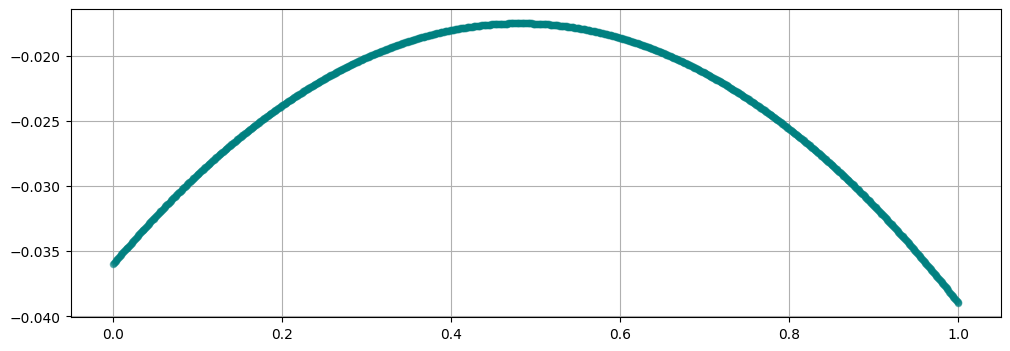

In [698]:
params, X, Y = make_poly_data(1000, degree=3,fuzz=None, seed=None)
kurvy.plots.simple_plot(X,Y)

In [706]:
Xx = np.linspace(0,1,1000)
Yy =  0.5*Xx**3 - 1*Xx**2 + 1*Xx - 0.5

(0.0, 1.0)

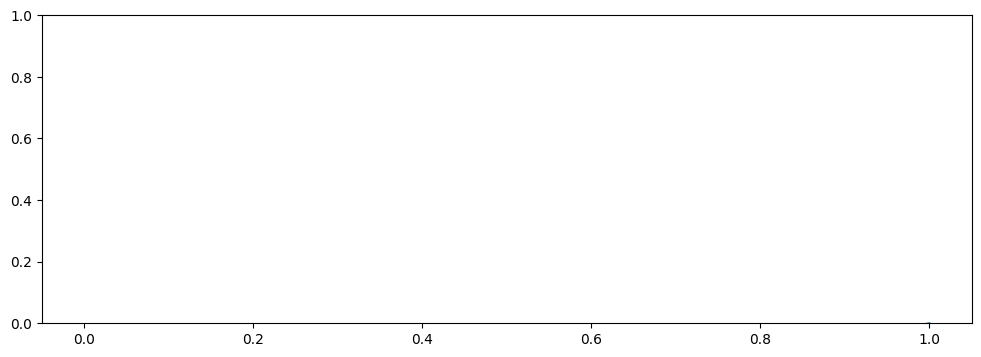

In [709]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(Xx,Yy)
ax.set_ylim(bottom=0,top=1)

In [662]:
params

[-17.393,
 -7.538,
 3.394,
 -12.599,
 18.344,
 0.296,
 4.541,
 8.002,
 -12.531,
 -3.039,
 -11.063,
 5.628,
 2.559,
 7.74,
 0.109]

In [150]:
rng.integers(2,5)

2

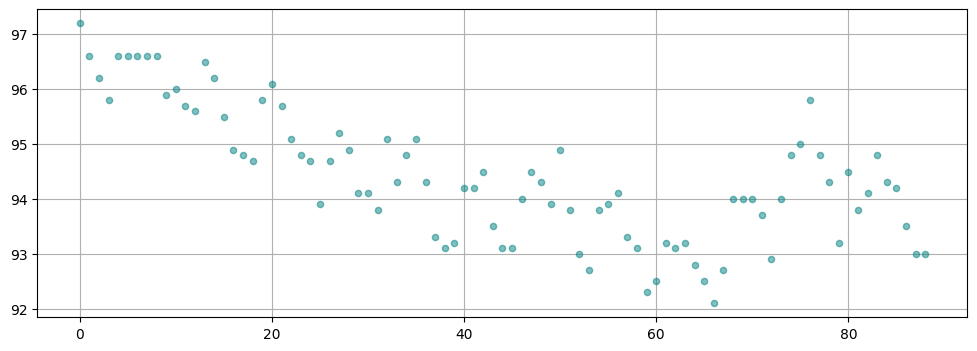

In [265]:
df = pd.read_csv("weight.csv",header=None).rename(columns={0:"date",1:"kg"})
X_raw = np.array(df.index)
Y_raw = np.array(df["kg"])
kurvy.plots.simple_plot(X_raw, Y_raw)

In [644]:
# scale X data
X_raw_min = np.min(X_raw)
X_raw_max = np.max(X_raw)
X = kurvy.utils.min_max_scale(X_raw,scale_min,scale_max,X_raw_min,X_raw_max)
# scale Y data
Y_raw_min = np.min(Y_raw)
Y_raw_max = np.max(Y_raw)
Y = kurvy.utils.min_max_scale(Y_raw,scale_min,scale_max,Y_raw_min,Y_raw_max)
# combine X and Y data
XY = np.dstack((X,Y))[0]

In [645]:
# shuffle data
shuffle_idxs = rng.choice(XY.shape[0],XY.shape[0],replace=False)
XY = XY[shuffle_idxs]

In [646]:
# split data
split_pcts = (85,15)
splits = kurvy.utils.split_n(XY.shape[0],split_pcts)
XY_train = XY[:splits[0]]
X_train = XY_train[:,0]
Y_train = XY_train[:,1]
XY_test = XY[splits[0]:]
# sorted data for plots
X_train_sorted = XY_train[np.argsort(XY_train[:,0])][:,0]
Y_train_sorted = XY_train[np.argsort(XY_train[:,0])][:,1]

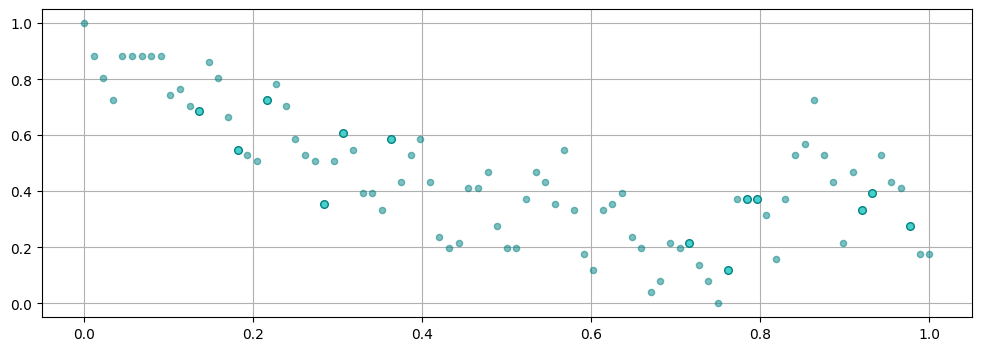

In [647]:
kurvy.utils.simple_plot(X_train_sorted,Y_train_sorted,test_data=XY_test)